In [10]:
import pandas as pd
#dataset: https://www.kaggle.com/datasets/agarwalyashhh/dog-adaptability/data
#training file 
file_path = 'data/data/training_data.csv'
df = pd.read_csv(file_path)

#test file 
file_path_test = 'data/data/test_data.csv'
df_test = pd.read_csv(file_path_test)

print(df.shape)
print(df_test.shape)

#checking missing data
missing_data = df.isnull().sum()
missing_data_test = df_test.isnull().sum()

#columns with missing data
print("Missing data per column:\n", missing_data)
print("Missing data per column:\n", missing_data_test)



(3200, 35)
(800, 34)
Missing data per column:
 id                                  0
adaptability                        0
good_for_novice_owners              0
sensitivity_level                  19
tolerates_being_alone               0
tolerates_cold_weather              0
tolerates_hot_weather               0
all_around_friendliness             0
affectionate_with_family            0
incredibly_kifriendly_dogs          0
dog_friendly                        0
friendly_towarstrangers             0
health_grooming                     0
amount_of_shedding                  0
drooling_potential                  0
easy_to_groom                       0
general_health                      0
potential_for_weight_gain           0
size                                0
trainability                        0
easy_to_train                       0
intelligence                        0
potential_for_mouthiness            0
prey_drive                         25
tendency_to_bark_or_howl            0
wan


Data names and types: 
id                                   int64
adaptability                         int64
good_for_novice_owners               int64
sensitivity_level                  float64
tolerates_being_alone                int64
tolerates_cold_weather               int64
tolerates_hot_weather                int64
all_around_friendliness              int64
affectionate_with_family             int64
incredibly_kifriendly_dogs           int64
dog_friendly                         int64
friendly_towarstrangers              int64
health_grooming                      int64
amount_of_shedding                   int64
drooling_potential                   int64
easy_to_groom                        int64
general_health                       int64
potential_for_weight_gain            int64
size                                 int64
trainability                         int64
easy_to_train                        int64
intelligence                         int64
potential_for_mouthiness      

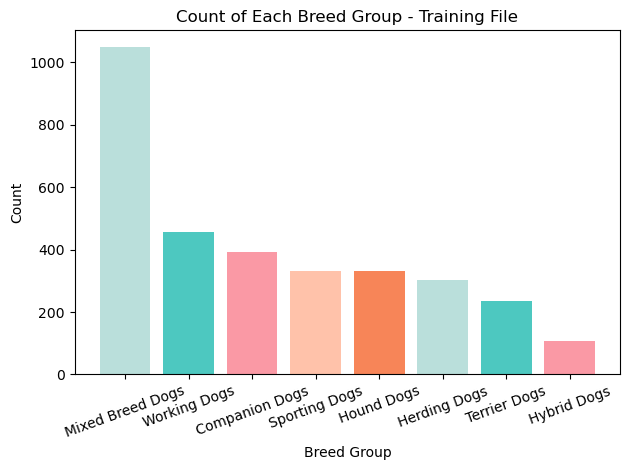

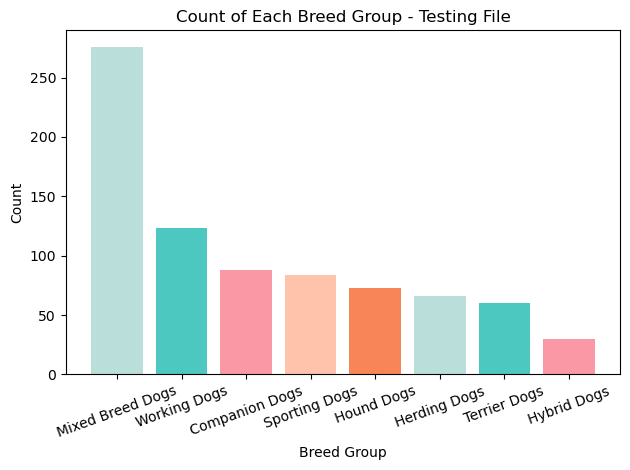

In [11]:
import matplotlib.pyplot as plt

#data types
print('\nData names and types: ')
pd.set_option("display.max_rows", 10000)
print(df.dtypes)

colors = ['#badfdb', '#4dc8c0', '#fa99a5', '#ffc2aa', '#f78558' ] #custom color scheme 

breed_counts = df['breed_group'].value_counts()
plt.bar(breed_counts.index, breed_counts.values, color=colors)
plt.title('Count of Each Breed Group - Training File')
plt.xlabel('Breed Group')
plt.ylabel('Count')
plt.xticks(rotation=20)
plt.tight_layout()
plt.savefig("figures/breeds.png", dpi=300, transparent=True)
plt.show()
 
#visualize target variable (breed group)
#test set
breed_counts = df_test['breed_group'].value_counts()
plt.bar(breed_counts.index, breed_counts.values, color=colors)
plt.title('Count of Each Breed Group - Testing File')
plt.xlabel('Breed Group')
plt.ylabel('Count')
plt.xticks(rotation=20)
plt.tight_layout()
plt.savefig("figures/breeds_test.png", dpi=300, transparent=True) 
plt.show()


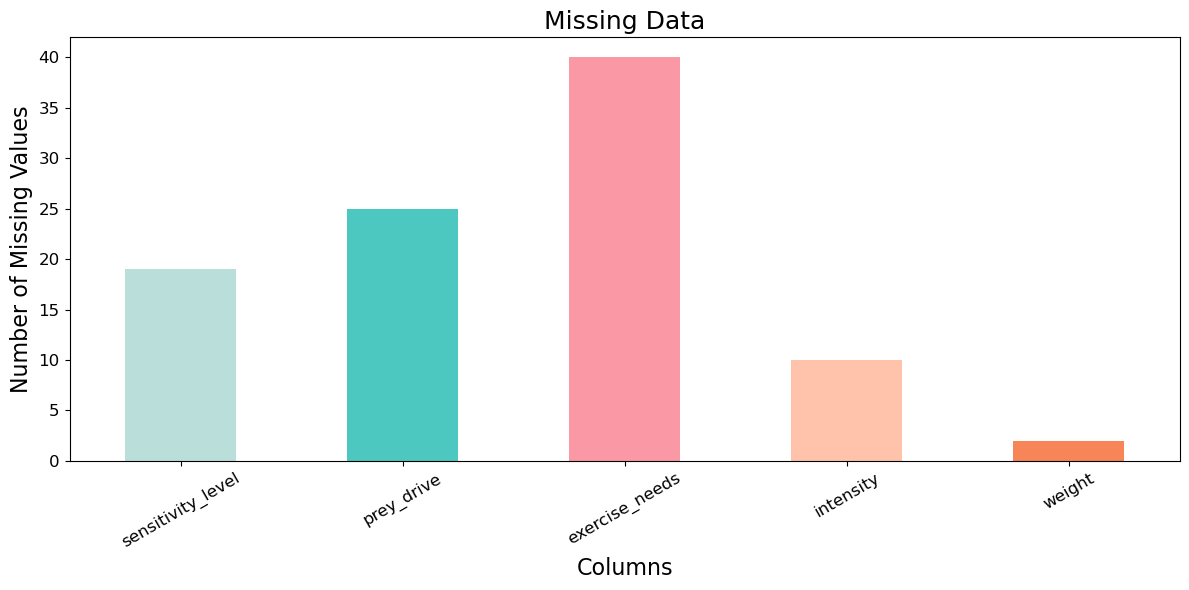

In [12]:
#visualizing what features have missing data 
missing_data = missing_data[missing_data > 0]

plt.figure(figsize=(12, 6))
missing_data.plot(kind='bar', color=colors)

plt.title('Missing Data', fontsize=18)
plt.xlabel('Columns', fontsize=16)
plt.ylabel('Number of Missing Values', fontsize=16)
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('figures/missingdata.png', transparent=True)
plt.show()

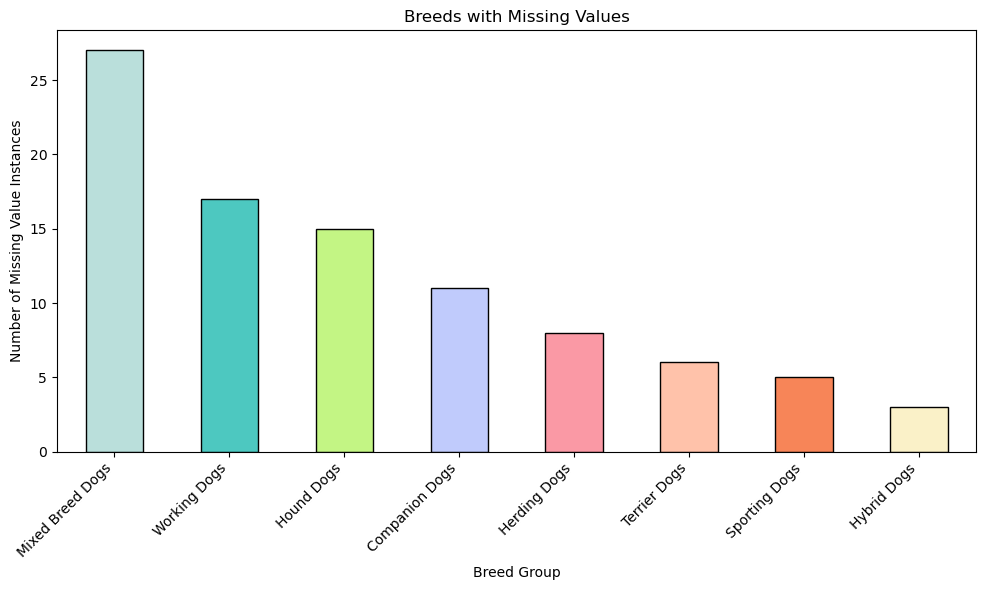

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'data/data/training_data.csv'
df2 = pd.read_csv(file_path)

colors = ['#badfdb', '#4dc8c0','#c3f584','#c0cbfc', '#fa99a5', '#ffc2aa', '#f78558', '#faf1c8' ]

#features with missing values
features_with_missing = ['sensitivity_level', 'prey_drive', 'exercise_needs', 'intensity']

#rows with missing values
missing = df2[features_with_missing].isnull().any(axis=1)

#breeds with missing values
breeds_with_missing = df2[missing]['breed_group']

#count missing values for each breed
missing_counts = breeds_with_missing.value_counts()

#plot
plt.figure(figsize=(10, 6))
missing_counts.plot(kind='bar', color=colors, edgecolor='black')
plt.title('Breeds with Missing Values')
plt.xlabel('Breed Group')
plt.ylabel('Number of Missing Value Instances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('figures/breeds_missing_values.png', dpi=300, transparent=True)
plt.show()


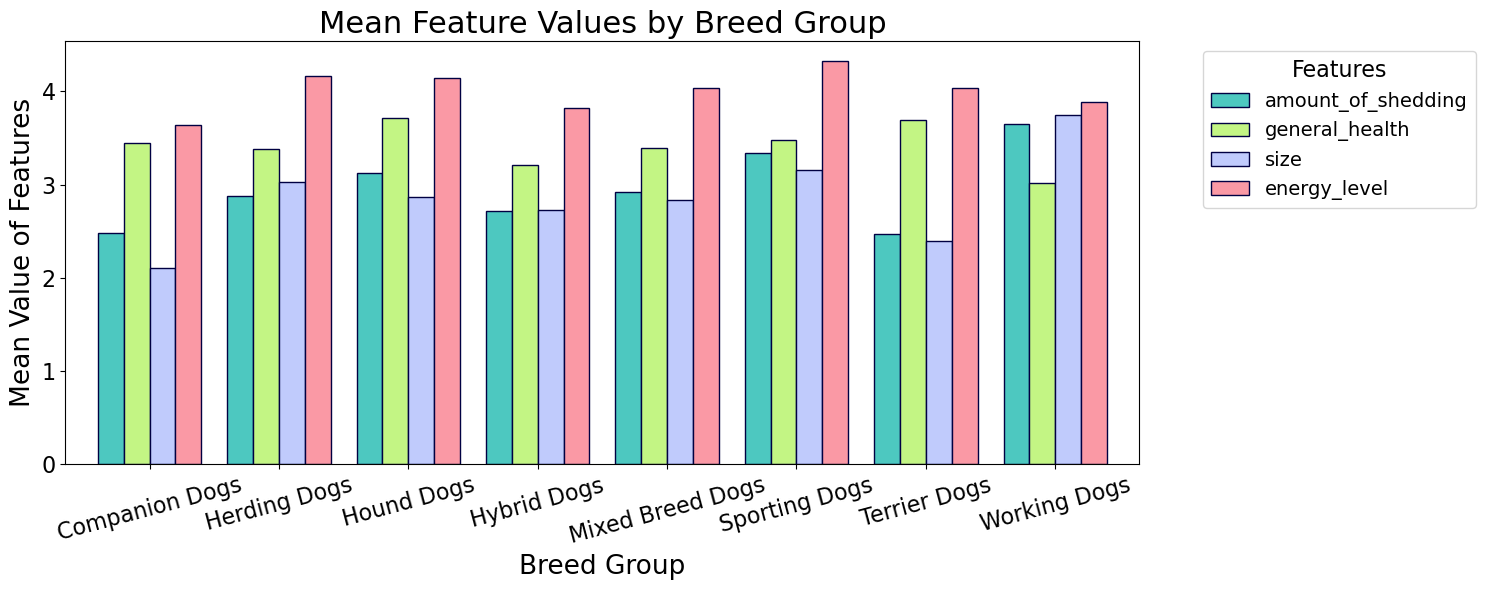

In [14]:
#plotting features with increased variablity between groups 
mean_values = df.groupby('breed_group')[[ 
    'amount_of_shedding', 
    'general_health', 'size',  
    'energy_level'   
]].mean()


#plot
colors = ['#badfdb', '#4dc8c0','#c3f584','#c0cbfc', '#fa99a5', '#ffc2aa', '#f78558', '#faf1c8' ]
colorsbar = ['#4dc8c0','#c3f584','#c0cbfc', '#fa99a5', '#ffc2aa', '#f78558', '#faf1c8' ]

mean_values.plot(kind='bar', figsize=(15, 6), color=colorsbar, width = .8, edgecolor = '#000042')
plt.title('Mean Feature Values by Breed Group', fontsize=22)
plt.xlabel('Breed Group', fontsize=19)
plt.ylabel('Mean Value of Features', fontsize=19)
plt.xticks(rotation=15)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14, title_fontsize=16)
plt.tight_layout()
plt.savefig('figures/mean_feature_values_by_breed_group.png', transparent=True, dpi=300)

plt.show()

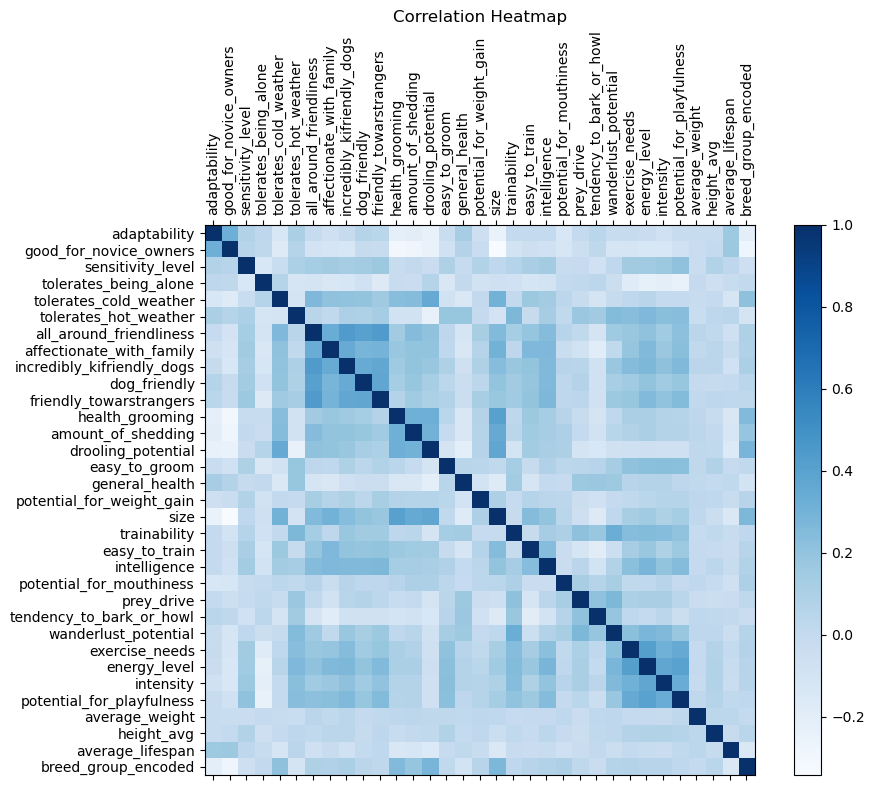

In [59]:
#correlation heatmap of ordinal variables to look for potential variabels to drop 
#using numeric columns only 
numeric_df = df.select_dtypes(include=['number'])
numeric_df.drop(columns=['id'], inplace=True)

#correlation matrix --> heatmap
correlation_matrix = numeric_df.corr()
#plotting
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(correlation_matrix, cmap='Blues')
plt.colorbar(cax)
ax.set_xticks(range(len(correlation_matrix.columns)))
ax.set_yticks(range(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=90, fontsize=10)
ax.set_yticklabels(correlation_matrix.columns, fontsize=10)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('figures/corr_heatmap.png', transparent=True, dpi=300)
plt.show()



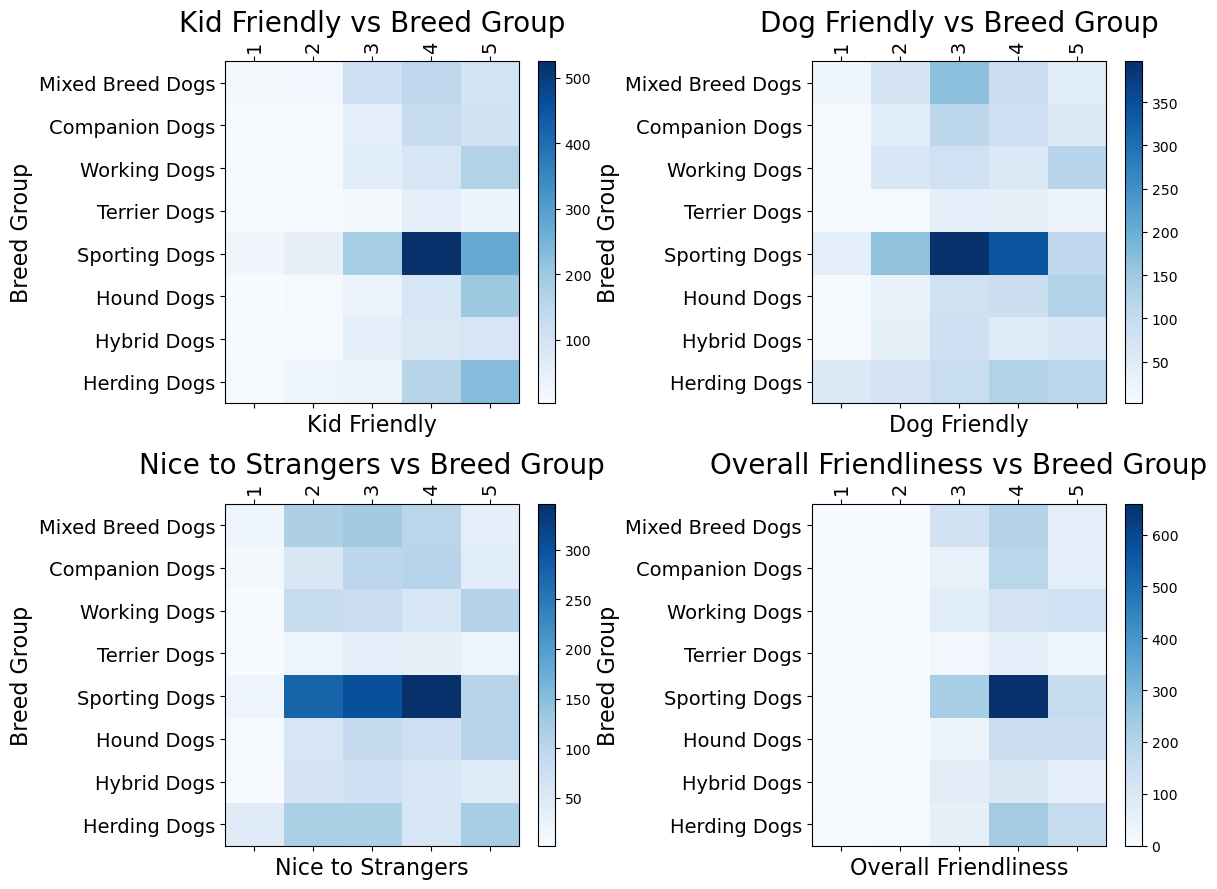

In [ ]:
#looking at similar features to check for correlations 
breed_groups = df['breed_group'].unique()
variables = ['incredibly_kifriendly_dogs', 'dog_friendly', 'friendly_towarstrangers', 'all_around_friendliness']
names = ['Kid Friendly', 'Dog Friendly', 'Nice to Strangers', 'Overall Friendliness']

fig, axes = plt.subplots(2, 2, figsize=(12, 9)) 

#iterate over each variable to create a heatmap
for i, var in enumerate(variables):
    contingency_table = pd.crosstab(df['breed_group'], df[var])
    
    #plot
    row, col = divmod(i, 2) 
    cax = axes[row, col].matshow(contingency_table, cmap='Blues', aspect='auto')
    
    fig.colorbar(cax, ax=axes[row, col])
    
    axes[row, col].set_title(f'{names[i]} vs Breed Group', fontsize=20)
    axes[row, col].set_xticks(range(len(contingency_table.columns)))
    axes[row, col].set_yticks(range(len(breed_groups)))
    axes[row, col].set_xticklabels(contingency_table.columns, rotation=90, fontsize=14)
    axes[row, col].set_yticklabels(breed_groups, fontsize=14)
    axes[row, col].set_xlabel(names[i], fontsize=16)
    axes[row, col].set_ylabel('Breed Group', fontsize=16)

plt.tight_layout()
plt.savefig('figures/heatmaps.png', transparent=True, dpi=300)
plt.show()

Series([], Name: weight, dtype: object)


/var/folders/13/0qfb1y013z90m2flyf4_8mrr0000gn/T/ipykernel_75548/1570864264.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['breed_group'] == breed]['average_weight'].dropna() for breed in df['breed_group'].unique()],


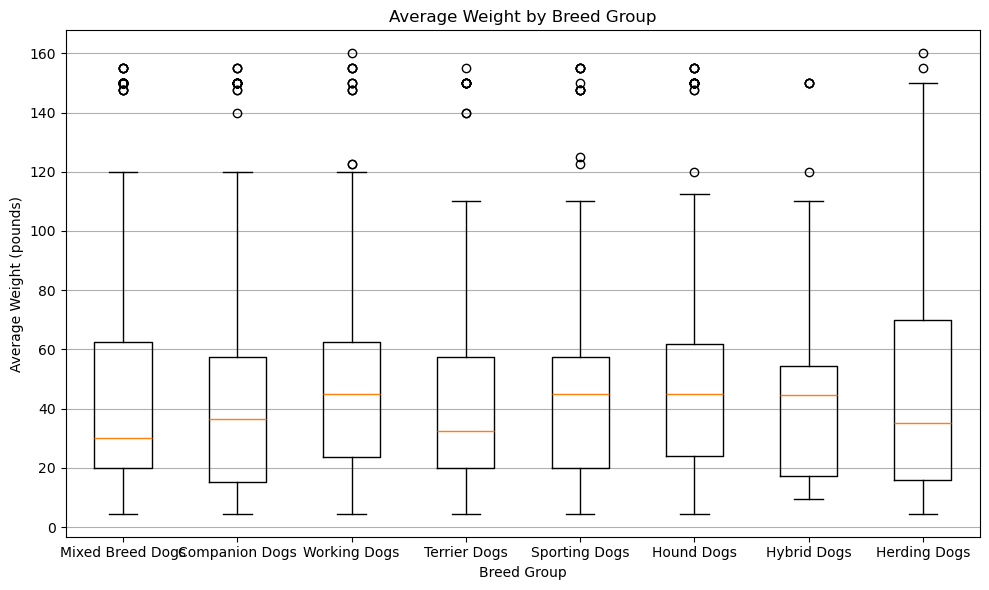

Mixed Breed Dogs
count    1050.000000
mean       47.011429
std        38.728484
min         4.500000
25%        20.000000
50%        30.000000
75%        62.500000
max       155.000000
Name: average_weight, dtype: float64
Companion Dogs
count    391.000000
mean      45.084399
std       36.128589
min        4.500000
25%       15.250000
50%       36.500000
75%       57.500000
max      155.000000
Name: average_weight, dtype: float64
Working Dogs
count    457.000000
mean      48.459519
std       33.479570
min        4.500000
25%       23.500000
50%       45.000000
75%       62.500000
max      160.000000
Name: average_weight, dtype: float64
Terrier Dogs
count    233.000000
mean      44.418455
std       33.615694
min        4.500000
25%       20.000000
50%       32.500000
75%       57.500000
max      155.000000
Name: average_weight, dtype: float64
Sporting Dogs
count    330.000000
mean      46.315152
std       32.799785
min        4.500000
25%       20.000000
50%       45.000000
75%       57

In [23]:
#had to create functions to turn the strings describing dog weight, height, and lifespan into continuous variables (took averages)
import re

def extract_average_weight(weight_str):
    if isinstance(weight_str, str):
        #use regex to find all numbers in the string
        numbers = re.findall(r'\d+', weight_str)
        if len(numbers) == 2:  #if two numbers are found
            num1 = int(numbers[0])
            num2 = int(numbers[1])
            return (num1 + num2) / 2
        elif len(numbers) == 1:  #if only one number is found
            return int(numbers[0])  #return if only one number (weight)
    return None  


#apply the function to weight column of training and test sets 
df['average_weight'] = df['weight'].apply(extract_average_weight)
df_test['average_weight'] = df_test['weight'].apply(extract_average_weight)

#drop rows with missing data in weight column (only 2)
df = df.dropna(subset=['weight'])
df_test = df_test.dropna(subset=['weight'])

nan_rows = df[df['average_weight'].isna()]
print(nan_rows['weight'])

#visualize the average weight by breed group
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['breed_group'] == breed]['average_weight'].dropna() for breed in df['breed_group'].unique()],
            labels=df['breed_group'].unique())
plt.title('Average Weight by Breed Group')
plt.xlabel('Breed Group')
plt.ylabel('Average Weight (pounds)')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('figures/avg_weight.png', transparent=True, dpi=300)
plt.show()

#inspecting average weights 
for breed in df['breed_group'].unique():
    print(breed)
    print(df[df['breed_group'] == breed]['average_weight'].describe())

In [24]:
#function to convert height strings to average height in inches
heights=df['height']
heights_test = df_test['height']
def extract_inches_range(height):
    matches = re.findall(r'\d+', height)
    inches = [int(match) for match in matches if int(match) <= 31]  
    return min(inches), max(inches)
inches_ranges = [extract_inches_range(height) for height in heights]
inches_ranges_test = [extract_inches_range(height) for height in heights_test]

def find_avg(x,arr):
    for i in x:
        if i[0]==None:
            arr.append(None)
        else:
            arr.append(((i[1]+i[0])/2))

#apply to height of training and test sets 
height_avg=[]
find_avg(inches_ranges,height_avg)
df['height_avg'] = height_avg

height_avg_test = []
find_avg(inches_ranges_test, height_avg_test)
df_test['height_avg'] = height_avg_test

#lifespan string to average lifespan 
def extract_average_lifespace(lifespan_str):
    if isinstance(lifespan_str, str):
        numbers = re.findall(r'\d+', lifespan_str)
        if len(numbers) == 2:
            num1 = int(numbers[0])
            num2 = int(numbers[1])
            
            return (num1 + num2) / 2
    return None  

#apply to training and test sets 
df['average_lifespan'] = df['lifspan'].apply(extract_average_weight)
df_test['average_lifespan'] = df_test['lifspan'].apply(extract_average_weight)

In [25]:
#preprocessing
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

#label encode breed group from string to number 
df['breed_group_encoded'] = label_encoder.fit_transform(df['breed_group'])
df_test['breed_group_encoded'] = label_encoder.fit_transform(df_test['breed_group'])

#drop columns that we converted to averages/labels (also dropping apartment living bc it was the target variable for the project I got the set from)
df = df.drop(columns=['breed_group', 'height', 'weight', 'lifspan', 'adapts_well_to_apartment_living'])

#same for test set - doesn't have apartment living bc original target variable 
df_test = df_test.drop(columns=['breed_group', 'height', 'weight', 'lifspan'])



In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import numpy as np
from sklearn.metrics import make_scorer, f1_score
from collections import Counter


#define features and target
X = df.drop(columns=['breed_group_encoded'])
y = df['breed_group_encoded']

#preprocessing features 
features_with_missing = ['sensitivity_level', 'prey_drive', 'exercise_needs', 'intensity']
std_ftrs = ['height_avg', 'average_weight', 'average_lifespan']

#replace missing ordinal values with 0 (since everything is alraedy 1-5, didn't want to use OrdinalEncoder)
df[features_with_missing] = df[features_with_missing].fillna(0)
df_test[features_with_missing] = df_test[features_with_missing].fillna(0)

#scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('std', StandardScaler(), std_ftrs)
    ],
    remainder='passthrough'
)
 
#F1 scoring function with weighted average bc imbalanced
f1_scorer = make_scorer(f1_score, average='weighted')

#function for the ML pipeline
def MLpipe_SKFold_F1(X, y, preprocessor, ML_algo, param_grid):
    '''
    This function splits the data to train/val + uses the test set (60/20/20) and then applies StratfiedKFold with 4 folds to other.
    The f1 score is used in cross-validation.
 
    '''

    #lists to be returned 
    cv_acc = []
    val_acc = []
    f1_scores = []
    test_scores = []
    std_test = []
    best_models = []
    all_test_predictions = []
    baseline_acc = []
    baseline_f1 = []
    baseline_std = []

    #random states
    random_states = [7, 12, 42, 63]

    #loop through random states
    for random_state in random_states:
        print(f"Processing random_state = {random_state}")

        #splitting and pipeline 
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, stratify=y, random_state=random_state)
        X_test, y_test = df_test.drop(columns=['breed_group_encoded']), df_test['breed_group_encoded']

    
        clf = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', ML_algo)
        ])

        #cross-validation
        kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
        grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=kfold, scoring=f1_scorer, verbose=1, n_jobs=-1)
        grid_search.fit(X_train, y_train)

        #best parameters and score
        print("Best Parameters:", grid_search.best_params_)
        print("Best Cross-Validation Accuracy:", grid_search.best_score_)

        #baseline scores
        most_common_class = Counter(y_train).most_common(1)[0][0]
        baseline_predictions = [most_common_class] * len(y_test)
        baseline_accuracy = accuracy_score(y_test, baseline_predictions)
        baselinef1 = f1_score(y_test, baseline_predictions, average='weighted')
        baseline_acc.append(baseline_accuracy)
        baseline_f1.append(baselinef1)

        #evaluate on validation set
        val_predictions = grid_search.best_estimator_.predict(X_val)
        val_accuracy = accuracy_score(y_val, val_predictions)
        print("Validation Accuracy:", val_accuracy)

        #evaluate on test set
        test_predictions = grid_search.best_estimator_.predict(X_test)
        test_accuracy = accuracy_score(y_test, test_predictions)
        print("Test Accuracy:", test_accuracy)

        #calculate F1 Score for validation set
        val_f1 = f1_score(y_val, val_predictions, average='weighted')  # 'weighted' handles class imbalance
        print("Validation F1 Score:", val_f1)

        #calculate F1 Score for test set
        test_f1 = f1_score(y_test, test_predictions, average='weighted')  # 'weighted' handles class imbalance
        print("Test F1 Score:", test_f1)

        #cross-validation results
        cv_results = grid_search.cv_results_

        #standard deviation of test scores for the best parameters
        std_dev = cv_results['std_test_score'][grid_search.best_index_]

        print("Standard Deviation of Test Scores:", std_dev)
        
        #store results
        cv_acc.append(grid_search.best_score_)
        val_acc.append(val_accuracy)
        f1_scores.append(test_f1)
        test_scores.append(test_accuracy)
        std_test.append(std_dev)
        best_models.append(grid_search.best_estimator_)
        all_test_predictions.append(test_predictions)
    
    #return the various scores, models, and stats for later use (when analyzing and understanding the model)
    return cv_acc, val_acc, test_scores, f1_scores, std_test, best_models, all_test_predictions, baseline_acc, baseline_f1




In [60]:
#save datasets
#split same way as in method 
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)
X_test = df_test.drop(columns=['breed_group_encoded'])
y_test = df_test['breed_group_encoded']

#preprocess
X_train_prep = preprocessor.fit_transform(X_train)
X_val_prep = preprocessor.transform(X_val)
X_test_prep = preprocessor.transform(X_test)

#save preprocessed datasets
pd.DataFrame(X_train_prep).to_csv('data/X_train.csv')
pd.DataFrame(X_val_prep).to_csv('data/X_val.csv')
pd.DataFrame(X_test_prep).to_csv('data/X_test.csv')
pd.Series(y_train).to_csv('data/y_train.csv')
pd.Series(y_val).to_csv('data/y_val.csv')
pd.Series(y_test).to_csv('data/y_test.csv')



In [ ]:
#Logistic Regression - start with LogReg because simple, linear model to check if linear relation 
from sklearn.linear_model import LogisticRegression

ML_algo = LogisticRegression(max_iter=2000, class_weight='balanced') #imbalanced dataset 

#parameter grid for logistic regression 
param_grid = {
    'classifier__C': [1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4],
    'classifier__solver': ['liblinear'], #because smaller dataset
    'classifier__penalty': ['l1', 'l2']
}

#call the function
cv_acc, val_acc, test_scores, f1_scores, std_test, best_models, all_test_predictions, baseline_acc, baseline_f1 = MLpipe_SKFold_F1(X, y, preprocessor, ML_algo, param_grid)

#results
print("\nTest scores for all random states:", test_scores)
print("\nMean test score:", np.mean(test_scores))
print("\nMean f1 score:", np.mean(f1_scores))
print("\nStd f1 score:", np.std(f1_scores))
print("Standard deviation of test scores:", np.std(test_scores))
mean_baseline_acc = np.mean(baseline_acc)
mean_baselinef1_score = np.mean(baseline_f1)
std_baseline_acc = np.std(test_scores)
std_baselinef1_score = np.std(test_scores)
print("Mean baseline accuracy:", mean_baseline_acc)
print("Mean of f1 score:", mean_baselinef1_score)
print("Standard deviation of baseline accuracies:", std_baseline_acc)
print("Standard deviation of f1 score:", std_baselinef1_score)

import pickle 
#save results and models using pickle
with open('results/logistic_regression_results.save', 'wb') as file:
    pickle.dump({
        'f1_score': f1_scores[2],
        'best_model': best_models[2],
        'all_test_predictions': all_test_predictions[2],
        'X_test': X_test,
        'y_test': y_test
    }, file)





Processing random_state = 7
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Best Parameters: {'classifier__C': 1.0, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.38833060218522497
Validation Accuracy: 0.37375
Test Accuracy: 0.37875
Validation F1 Score: 0.37690176130311365
Test F1 Score: 0.3889981236967277
Standard Deviation of Test Scores: 0.016930560912706775
Processing random_state = 12
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Best Parameters: {'classifier__C': 1000.0, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.3799928459758025
Validation Accuracy: 0.385
Test Accuracy: 0.40375
Validation F1 Score: 0.38708139739688713
Test F1 Score: 0.41018222871024074
Standard Deviation of Test Scores: 0.019232037076083005
Processing random_state = 42
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Best Parameters: {'classifier__C': 1.0, 'classifier_

In [49]:
#define the classifier and parameter grid
ML_algo = RandomForestClassifier(random_state=42, class_weight='balanced')
param_grid = {
    'classifier__n_estimators': [100, 400, 500, 600],
    'classifier__max_depth': [None, 10, 20, 30]
}

#call the function
# test_scores, best_models = MLpipe_SKFold_Acc(X, y, preprocessor, ML_algo, param_grid)
cv_acc, val_acc, test_scores, f1_scores, std_test, best_models, all_test_predictions, baseline_acc, baseline_f1 = MLpipe_SKFold_F1(X, y, preprocessor, ML_algo, param_grid)

rf_model = best_models[2] #best model is at random state 42
rf_pred = all_test_predictions

#results
print("\nTest scores for all random states:", test_scores)
print("\nMean test score:", np.mean(test_scores))
print("\nMean f1 score:", np.mean(f1_scores))
print("\nStd f1 score:", np.std(f1_scores))
print("Standard deviation of test scores:", np.std(test_scores))

#save results and models using pickle
with open('results/random_forest_results.save', 'wb') as file:
    pickle.dump({
        'f1_score': f1_scores[2],
        'best_model': best_models[2],
        'all_test_predictions': all_test_predictions[2],
        'X_test': X_test,
        'y_test': y_test
    }, file)

Processing random_state = 7
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'classifier__max_depth': 10, 'classifier__n_estimators': 600}
Best Cross-Validation Accuracy: 0.4256992008048557
Validation Accuracy: 0.44375
Test Accuracy: 0.45875
Validation F1 Score: 0.41897401536740037
Test F1 Score: 0.4264771007977513
Standard Deviation of Test Scores: 0.02417064362592459
Processing random_state = 12
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'classifier__max_depth': 10, 'classifier__n_estimators': 500}
Best Cross-Validation Accuracy: 0.4214051294201607
Validation Accuracy: 0.44875
Test Accuracy: 0.45625
Validation F1 Score: 0.42063100294112693
Test F1 Score: 0.42727556921972587
Standard Deviation of Test Scores: 0.01797472070398905
Processing random_state = 42
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'classifier__max_depth': 10, 'classifier__n_estimators': 500}
Best Cross-Validation Ac

In [34]:
#Support Vector Machine
from sklearn.svm import SVC

ML_algo = SVC(random_state=42, class_weight = 'balanced')

#define the parameter grid - various tuned, best ones are uncommented to reduce run time after testing them 
param_grid = {
    'classifier__C': [1e0, 1e1, 1e2, 1e3, 1e4],      
    #'classifier__C': [1e5, 1e6, 1e7, 1e8],  
    'classifier__kernel': ['rbf'], 
    #'classifier__kernel': ['linear', 'rbf', 'poly'],
    #'classifier__gamma': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1],
    'classifier__gamma': [1e-5]            
}

#call the function
cv_acc, val_acc, test_scores, f1_scores, std_test, best_models, all_test_predictions, baseline_acc, baseline_f1 = MLpipe_SKFold_F1(X, y, preprocessor, ML_algo, param_grid)

#results
print("\nTest scores for all random states:", test_scores)
print("\nMean test score:", np.mean(test_scores))
print("\nMean f1 score:", np.mean(f1_scores))
print("\nStd f1 score:", np.std(f1_scores))
print("Standard deviation of test scores:", np.std(test_scores))

#save results and models using pickle
with open('results/SVC_results.save', 'wb') as file:
    pickle.dump({
        'f1_score': f1_scores[2],
        'best_model': best_models[2],
        'all_test_predictions': all_test_predictions[2],
        'X_test': X_test,
        'y_test': y_test
    }, file)

Processing random_state = 7
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'classifier__C': 10000.0, 'classifier__gamma': 1e-05, 'classifier__kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.29970441305104084
Validation Accuracy: 0.2975
Test Accuracy: 0.0975
Validation F1 Score: 0.308426612974296
Test F1 Score: 0.04542178258044222
Standard Deviation of Test Scores: 0.011730452323229322
Processing random_state = 12
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'classifier__C': 10000.0, 'classifier__gamma': 1e-05, 'classifier__kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.2965721559197726
Validation Accuracy: 0.285
Test Accuracy: 0.165
Validation F1 Score: 0.3002951242216996
Test F1 Score: 0.13718839144152337
Standard Deviation of Test Scores: 0.01243009301717189
Processing random_state = 42
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'classifier__C': 1000.0, 'classifier__gamma': 1e-05, 

In [35]:
import xgboost as xgb
from sklearn.model_selection import ParameterGrid, train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_validate

#Did not use defined method because caused difficulty with cross validation and early stopping, 
#felt it made more sense to create XGBoost classification separately so there were not a bunch of
#conditionals in the other method 
 
#splitting training 
X = df.drop(columns=['breed_group_encoded'])
y = df['breed_group_encoded']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

#splitting test 
X_test = df_test.drop(columns=['breed_group_encoded'])
y_test = df_test['breed_group_encoded']

#parameter grid
param_grid = {
    'n_estimators': [600],          # boosting rounds
    'subsample': [0.8],             # samples used per tree
    'colsample_bytree': [0.4]       # features used per tree
}
#parameter grid for tuning, commented out for runtime 
# param_grid = {
#     'n_estimators': [50, 100, 200, 500, 600, 800],           
#     'subsample': [[0.4, 0.6, 0.8, 1.0],            
#     'colsample_bytree': [.2, 0.4, 0.6, 0.8, 1.0]       
# }

#variables to store the best results
best_model = None
best_params = None
best_accuracy = 0

#lists to return 
val_acc = []
f1_scores = []
test_scores = []
std_test = []
best_models = []
all_test_predictions = []

#random states
random_states = [7, 12, 42, 63]

for random_state in random_states: 
    #check all parameter grid options (instead of GridSearchCV bc had issues with early stopping and runtime)
    for params in ParameterGrid(param_grid):
        #XGBoost classifier for multi-class classification
        XGB = xgb.XGBClassifier(
            early_stopping_rounds=20,
            eval_metric='mlogloss',  #multi-class logarithmic loss
            random_state=random_state,
            **params
        )
        
        XGB.fit(
            X_train, y_train,
            eval_set=[(X_val, y_val)],
            verbose=False
        )
        
        #evaluate on the validation set
        val_predictions = XGB.predict(X_val)
        val_accuracy = accuracy_score(y_val, val_predictions)
        val_acc.append(val_accuracy)
        
        #update the best model if current one is better
        if val_accuracy > best_accuracy:
            best_model = XGB
            best_params = params
            best_accuracy = val_accuracy

        #evaluate on the test set
        test_predictions = XGB.predict(X_test)
        test_accuracy = accuracy_score(y_test, test_predictions)
        f1 = f1_score(y_test, test_predictions, average='weighted')

        #print('best parameters', best_params)

        #results lists 
        test_scores.append(test_accuracy)
        f1_scores.append(f1)
        all_test_predictions.append(test_predictions)
        best_models.append(XGB)

#standard deviation of test F1 scores
std_test = np.std(f1_scores)

xgb_pred = all_test_predictions

print("Validation Accuracies:", val_acc)
print("Test Scores (Accuracy):", test_scores)
print("F1 Scores:", f1_scores)
print('Average F1 Score:', np.mean(f1_scores))
print("Standard Deviation of Test F1 Scores:", std_test)

#best parameters and validation accuracy
print("Best Parameters:", best_params)
print("Best Validation Accuracy:", best_accuracy)


test_predictions = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Avg test accuracy:", np.mean(test_scores))
print("Std of test accuracy", np.std(test_scores))

#save results and models using pickle
with open('results/XGB_results.save', 'wb') as file:
    pickle.dump({
        'f1_score': f1_scores[2],
        'best_model': best_models[2],
        'all_test_predictions': all_test_predictions[2],
        'X_test': X_test,
        'y_test': y_test
    }, file)



Validation Accuracies: [0.465, 0.46625, 0.46125, 0.4525]
Test Scores (Accuracy): [0.47, 0.475, 0.4525, 0.47625]
F1 Scores: [0.4286627101855322, 0.43905052338702516, 0.4143271250420056, 0.42810497819728305]
Average F1 Score: 0.4275363342029615
Standard Deviation of Test F1 Scores: 0.008784244960021895
Best Parameters: {'colsample_bytree': 0.4, 'n_estimators': 600, 'subsample': 0.8}
Best Validation Accuracy: 0.46625
Avg test accuracy: 0.4684375
Std of test accuracy 0.00949403595685206


In [ ]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import ParameterGrid, train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score

#with cross validation 

# features and target
X = df.drop(columns=['breed_group_encoded'])
y = df['breed_group_encoded']

#test dataset
X_test = df_test.drop(columns=['breed_group_encoded'])
y_test = df_test['breed_group_encoded']

#parameter grid for tuning
param_grid = {
    'n_estimators': [600],
    'learning_rate': [0.01],
    'subsample': [0.8],
    'colsample_bytree': [0.4]
}

#results list / vars
random_states = [7, 12, 42, 63]
best_model = None
best_params = None
best_f1 = 0
test_scores = []
f1_scores = []
val_acc = []
all_test_predictions = []
best_models = []

#manual cross-validation across 4 random states using stratify k fold with 5 folds 
for random_state in random_states:
    print(f"\nRandom State: {random_state}")
    #split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.25, stratify=y, random_state=random_state
    )
    
    for params in ParameterGrid(param_grid):
        print(f"Testing parameters: {params}")
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
        fold_f1_scores = []

        for train_index, val_index in skf.split(X_train, y_train):
            X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
            y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[val_index]

            #create model 
            xgb_model = xgb.XGBClassifier(
                **params,
                early_stopping_rounds=20,
                eval_metric='mlogloss',
                random_state=random_state
            )
            xgb_model.fit(
                X_fold_train, y_fold_train,
                eval_set=[(X_fold_val, y_fold_val)],
                verbose=False
            )

            #prediction
            val_predictions = xgb_model.predict(X_fold_val)
            val_f1 = f1_score(y_fold_val, val_predictions, average='weighted')
            fold_f1_scores.append(val_f1)

        #mean F1 score for this set
        mean_f1 = np.mean(fold_f1_scores)
        val_acc.append(mean_f1)

        #update best model
        if mean_f1 > best_f1:
            best_model = xgb_model
            best_params = params
            best_f1 = mean_f1

        #evaluate on the test set
        test_predictions = xgb_model.predict(X_test)
        test_accuracy = accuracy_score(y_test, test_predictions)
        f1 = f1_score(y_test, test_predictions, average='weighted')

        test_scores.append(test_accuracy)
        f1_scores.append(f1)
        all_test_predictions.append(test_predictions)
        best_models.append(xgb_model)

#std of test F1 scores
std_test = np.std(f1_scores)

#dispaly results
print("Validation Accuracies:", val_acc)
print("Test Scores (Accuracy):", test_scores)
print("F1 Scores:", f1_scores)
print("Average F1 Score:", np.mean(f1_scores))
print("Standard Deviation of Test F1 Scores:", std_test)
print("Best Parameters:", best_params)
print("Best Cross-Validation F1 Score:", best_f1)

final_test_predictions = best_model.predict(X_test)
final_test_accuracy = accuracy_score(y_test, final_test_predictions)
print("Final Test Accuracy:", final_test_accuracy)



Random State: 7
Testing parameters: {'colsample_bytree': 0.4, 'learning_rate': 0.01, 'n_estimators': 600, 'subsample': 0.8}

Random State: 12
Testing parameters: {'colsample_bytree': 0.4, 'learning_rate': 0.01, 'n_estimators': 600, 'subsample': 0.8}

Random State: 42
Testing parameters: {'colsample_bytree': 0.4, 'learning_rate': 0.01, 'n_estimators': 600, 'subsample': 0.8}

Random State: 63
Testing parameters: {'colsample_bytree': 0.4, 'learning_rate': 0.01, 'n_estimators': 600, 'subsample': 0.8}
Validation Accuracies: [0.4292677316137672, 0.43251212724569477, 0.42936521041121, 0.42303173785799897]
Test Scores (Accuracy): [0.5, 0.5, 0.50125, 0.4925]
F1 Scores: [0.44690095234243493, 0.4499198675526259, 0.44803062528696913, 0.44172195832530986]
Average F1 Score: 0.446643350876835
Standard Deviation of Test F1 Scores: 0.003039183894445815
Best Parameters: {'colsample_bytree': 0.4, 'learning_rate': 0.01, 'n_estimators': 600, 'subsample': 0.8}
Best Cross-Validation F1 Score: 0.432512127245

The mean baseline accuracy score is:  0.345
The STD of the baseline accuracy is:  0.011400897716846697


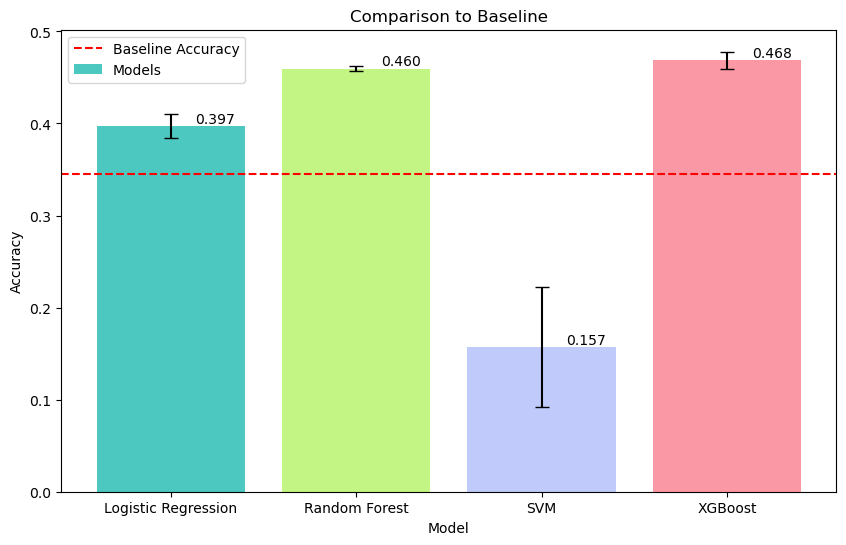

In [36]:
results = {
    "Model": ["Logistic Regression", "Random Forest", "SVM", "XGBoost"],
    "Mean Accuracy": [ 0.39718749999999997, 0.4596875, 0.1571875, 0.4684375],
    "Std Accuracy": [0.012789613706050714, 0.0032325251352464516, 0.06556470444339699, .00949403595685206],
    "Test Accuracy": [0.4375, .47875, .45375, 0.485]
}
results_df = pd.DataFrame(results)

mean_acc = results_df['Mean Accuracy']

print("The mean baseline accuracy score is: ", mean_baseline_acc)
print("The STD of the baseline accuracy is: ", std_baseline_acc)

plt.figure(figsize=(10, 6))
bars = plt.bar(results_df["Model"], results_df["Mean Accuracy"], yerr=results_df["Std Accuracy"], capsize=5, label="Models", color = colorsbar)
plt.axhline(y=mean_baseline_acc, color='r', linestyle='--', label="Baseline Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.title("Comparison to Baseline")

#mean accuracy values on bars
for bar, value in zip(bars, mean_acc):
    plt.text(
        bar.get_x() + bar.get_width() / 1.5,  
        bar.get_height() + 0.00001,  
        f"{value:.3f}",  
        ha='left', va='bottom'  
    )

plt.legend()
plt.savefig('figures/baseaccuracy.png', dpi=300, transparent = True)
plt.show()

The mean baseline f1 score is:  0.1769888475836431
The STD of the baseline f1 score is:  0.011400897716846697


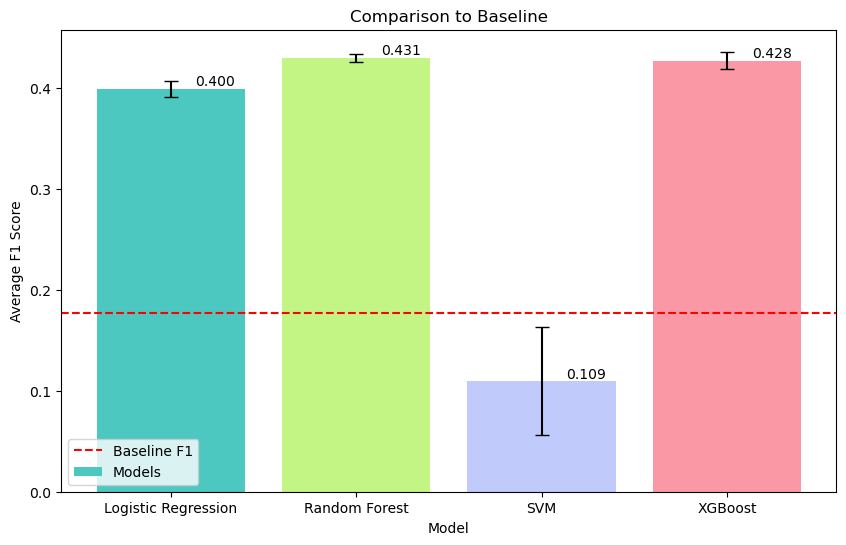

In [37]:
from collections import Counter
results = {
    "Model": ["Logistic Regression", "Random Forest", "SVM", "XGBoost"],
    "Mean F1": [0.39958560805401233, 0.43051835767395624, 0.10948829921948965, 0.4275363342029615],
    "Std F1": [0.007684438053259315, 0.0039433701077782836, 0.053649877602422964, 0.008784244960021895]
}
results_df = pd.DataFrame(results)

mean_f1 = results_df["Mean F1"]

print("The mean baseline f1 score is: ", mean_baselinef1_score)
print("The STD of the baseline f1 score is: ", std_baselinef1_score)

plt.figure(figsize=(10, 6))
bars = plt.bar(results_df["Model"], results_df["Mean F1"], yerr=results_df["Std F1"], capsize=5, label="Models", color = colorsbar)
plt.axhline(y=mean_baselinef1_score, color='r', linestyle='--', label="Baseline F1")
plt.ylabel("Average F1 Score")
plt.xlabel("Model")
plt.title("Comparison to Baseline")
plt.legend()

for bar, value in zip(bars, mean_f1):
    plt.text(
        bar.get_x() + bar.get_width() / 1.5,  
        bar.get_height() + 0.00001,
        f"{value:.3f}",  
        ha='left', va='bottom'  
    )

plt.savefig('figures/f1scorevsbaseline.png', dpi=300, transparent = True)
plt.show()

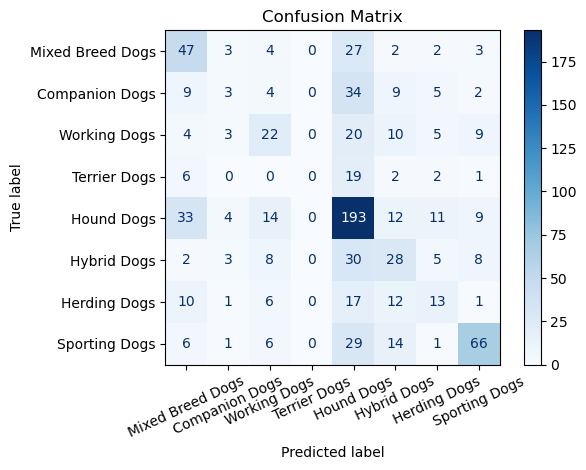

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay
#no longer actually displaying accuracy RF because I changed the model, but saved the figure before 
#Confusion Matrix - Best Model - RF
#label mapping
label_mapping = {
    4: 'Mixed Breed Dogs',
    0: 'Companion Dogs',
    7: 'Working Dogs',
    6: 'Terrier Dogs',
    2: 'Hound Dogs',
    3: 'Hybrid Dogs',
    1: 'Herding Dogs',
    5: 'Sporting Dogs'
}

#convert breed label numbers to string labels
def map_labels(numerical_labels, mapping):
    return [mapping[label] for label in numerical_labels]

test_predictions = rf_pred[2] #use random state = 42 for best results 

y_test_mapped = map_labels(y_test, label_mapping)
test_predictions_mapped = map_labels(test_predictions, label_mapping)

ConfusionMatrixDisplay.from_predictions(y_test_mapped, test_predictions_mapped, display_labels=label_mapping.values(), cmap='Blues')
plt.xticks(rotation=25)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.savefig('figures/cmRFAcc.png', dpi=300, transparent = True)
plt.show()

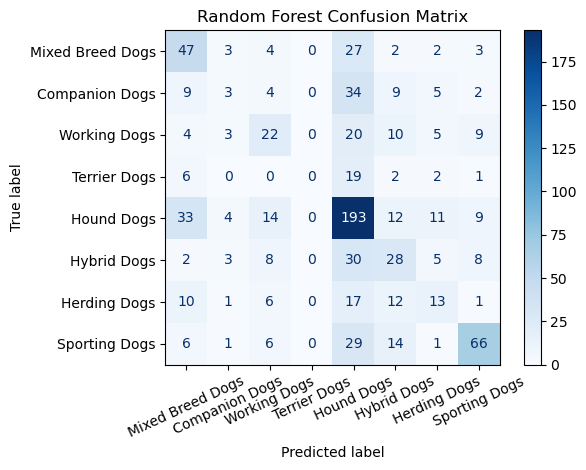

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay
#Confusion Matrix - Best Model - RF
#label mapping
label_mapping = {
    4: 'Mixed Breed Dogs',
    0: 'Companion Dogs',
    7: 'Working Dogs',
    6: 'Terrier Dogs',
    2: 'Hound Dogs',
    3: 'Hybrid Dogs',
    1: 'Herding Dogs',
    5: 'Sporting Dogs'
}

#convert breed label numbers to string labels
def map_labels(numerical_labels, mapping):
    return [mapping[label] for label in numerical_labels]

test_predictions = rf_pred[2] #use random state = 42 (highest score)

y_test_mapped = map_labels(y_test, label_mapping)
test_predictions_mapped = map_labels(test_predictions, label_mapping)

ConfusionMatrixDisplay.from_predictions(y_test_mapped, test_predictions_mapped, display_labels=label_mapping.values(), cmap='Blues')
plt.xticks(rotation=25)
plt.title("Random Forest Confusion Matrix")
plt.tight_layout()
plt.savefig('figures/cmRFF1.png', dpi=300, transparent = True)
plt.show()

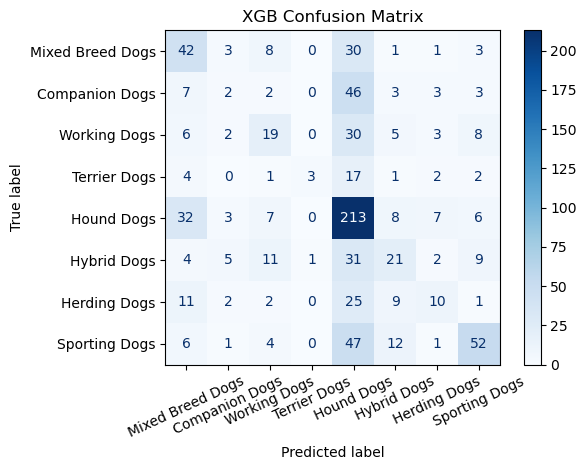

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay
#Confusion Matrix - Best Model - RF
#label mapping
label_mapping = {
    4: 'Mixed Breed Dogs',
    0: 'Companion Dogs',
    7: 'Working Dogs',
    6: 'Terrier Dogs',
    2: 'Hound Dogs',
    3: 'Hybrid Dogs',
    1: 'Herding Dogs',
    5: 'Sporting Dogs'
}

##convert breed label numbers to string labels
def map_labels(numerical_labels, mapping):
    return [mapping[label] for label in numerical_labels]

test_predictions = xgb_pred[2] #use random state = 42 (highest score)

y_test_mapped = map_labels(y_test, label_mapping)
test_predictions_mapped = map_labels(test_predictions, label_mapping)

ConfusionMatrixDisplay.from_predictions(y_test_mapped, test_predictions_mapped, display_labels=label_mapping.values(), cmap='Blues')
plt.xticks(rotation=25)
plt.title("XGB Confusion Matrix")
plt.tight_layout()
plt.savefig('figures/cmXGBf1.png', dpi=300, transparent = True)
plt.show()

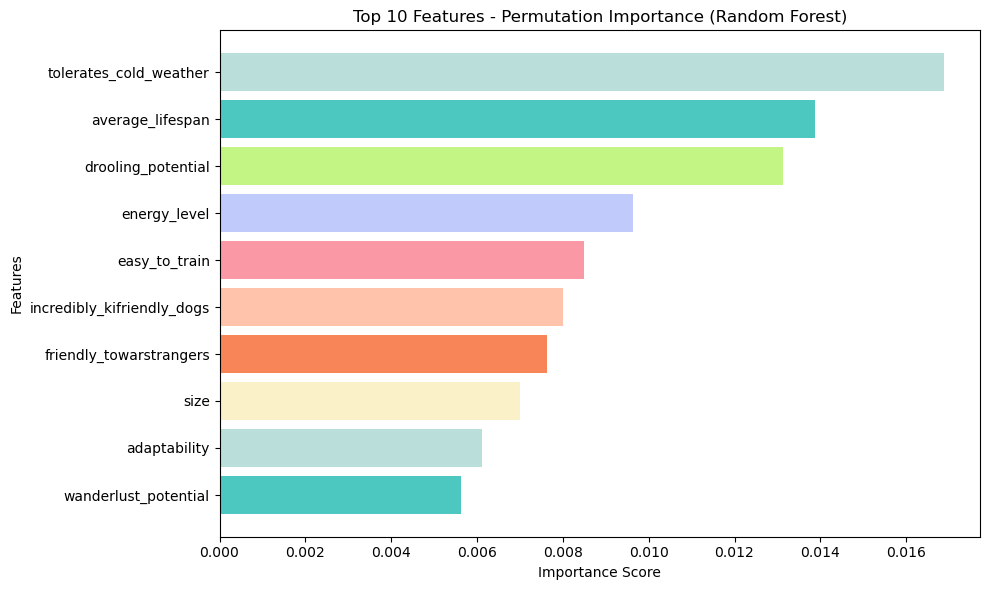

In [53]:
from sklearn.inspection import permutation_importance
#permutation importance for Random Forest
result = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=0)
means = result.importances_mean

#DataFrame of the features and their importances
data = {'Name': X_test.columns, 'Importance': means}
importance_df = pd.DataFrame(data)
importance_df = importance_df.sort_values(by=['Importance'], ascending=False)
top_10 = importance_df.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10['Name'], top_10['Importance'], color=colors)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Top 10 Features - Permutation Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('figures/permimportance.png', dpi=300, transparent=True)
plt.show()

100%|===================| 6380/6400 [04:10<00:00]        

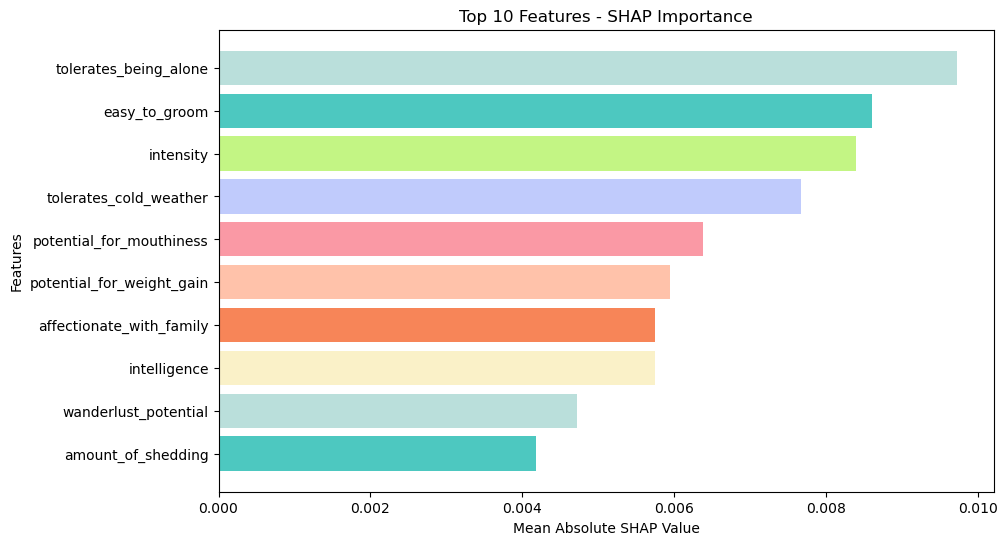

In [48]:
import shap
import numpy as np
#SHAP explainer for the Random Forest model
rf_classifier = rf_model.named_steps['classifier']
explainer = shap.Explainer(rf_classifier, X_test)

#SHAP values for the test data
shap_values = explainer(X_test)

#mean absolute SHAP values for each feature
shap_values_abs = np.abs(shap_values.values).mean(axis=0).mean(axis=1)

#DataFrame with feature names and their SHAP importance
shap_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': shap_values_abs
})

#sort features by importance
shap_importance_df = shap_importance_df.sort_values(by='Importance', ascending=False)

#top 10 features
top_10_shap = shap_importance_df.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_shap['Feature'], top_10_shap['Importance'], color=colors)
plt.xlabel('Mean Absolute SHAP Value')
plt.ylabel('Features')
plt.title('Top 10 Features - SHAP Importance')
plt.gca().invert_yaxis()  
plt.savefig('figures/shap.png', dpi=300, transparent=True)
plt.show()

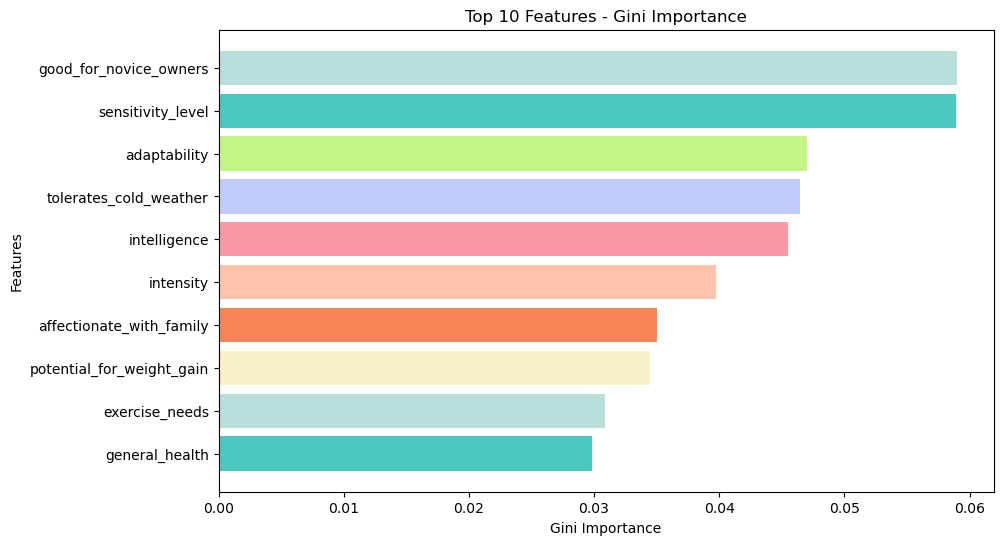

In [54]:
rf_classifier = rf_model.named_steps['classifier']
gini_importance = rf_classifier.feature_importances_

#DataFrame with feature names and gini importance
gini_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': gini_importance
})

#sorting and getting top 10
gini_importance_df = gini_importance_df.sort_values(by='Importance', ascending=False)
gini_importance_df = gini_importance_df[gini_importance_df['Feature'] != 'id']
top_10_gini = gini_importance_df.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_gini['Feature'], top_10_gini['Importance'], color=colors)
plt.xlabel('Gini Importance')
plt.ylabel('Features')
plt.title('Top 10 Features - Gini Importance')
plt.gca().invert_yaxis()  
plt.savefig('figures/gini.png', dpi=300, transparent=True)
plt.show()

In [55]:
import numpy as np
shap.initjs()
#preprocessor on the training data - have to preprocess and transform before doing multiclass shap force plot 
preprocessor.fit(df.drop(columns=['breed_group_encoded']))
X_test_preprocessed = preprocessor.transform(df_test.drop(columns=['breed_group_encoded']))
X_test_df = pd.DataFrame(X_test_preprocessed, columns = X.columns)
model = rf_model.named_steps['classifier']

#SHAP Explainer and values
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test_preprocessed)  # Shape: (num_classes, num_samples, num_features)

#random sample force plot 
class_idx = 1
sample_idx = 7
shap.force_plot(explainer.expected_value[0], shap_values[sample_idx, :, class_idx], X_test.iloc[sample_idx, :], link="logit")

NameError: name 'shap' is not defined

In [58]:
import numpy as np
#SHAP for Random Forest model
rf_classifier = rf_model.named_steps['classifier']
explainer = shap.Explainer(rf_classifier, X_test)

#overprediction: predicted hound when it was actually a companion dog 
#predicted 2 for sample 11
class_idx = 2
sample_idx = 11
shap_output = shap.force_plot(explainer.expected_value[2], shap_values[sample_idx, :, class_idx], X_test.iloc[sample_idx, :], link="logit")
#had to save as html because matplotlib / ed post was not working #292
shap.save_html('figures/shapplot1.html', shap_output)
shap_output




In [57]:
#correct prediction: predicted hound when it was actually hound 
#predicted 2 for sample 4
class_idx = 2
sample_idx = 4
shap.force_plot(explainer.expected_value[2], shap_values[sample_idx, :, class_idx], X_test.iloc[sample_idx, :], link="logit")
shap.save_html('figures/shapplot2.html', shap_output)
shap_output

In [59]:
#correct prediction: predicted companion when it was actually companion 
#predicted 0 for sample 11
class_idx = 0
sample_idx = 11
shap.force_plot(explainer.expected_value[0], shap_values[sample_idx, :, class_idx], X_test.iloc[sample_idx, :], link="logit")
shap.save_html('figures/shapplot3.html', shap_output)
shap_output

In [60]:
#correct prediction: predicted sporting when it was actually sporting 
class_idx = 5
sample_idx = 9
shap.force_plot(explainer.expected_value[5], shap_values[sample_idx, :, class_idx], X_test.iloc[sample_idx, :], link="logit")
shap.save_html('figures/shapplot4.html', shap_output)
shap_output